In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
# Prediction function with confidence threshold
def predict_with_threshold(model, image, threshold=0.8):
    """
    Predicts class with confidence threshold.
    Returns "False Detection" if max confidence is below threshold.
    """
    # Add batch dimension if needed
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)
    
    pred_probs = model.predict(image, verbose=0)[0]
    max_prob = np.max(pred_probs)
    predicted_class = np.argmax(pred_probs)
    
    if max_prob < threshold:
        return "False Detection", max_prob
    else:
        return categories[predicted_class], max_prob

In [3]:
# Function to load and preprocess images
def load_and_preprocess_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3) # Decode image into RGB
    img = tf.image.resize(img, [240,240]) # Resize the RGB image
    img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    
    return img

In [4]:
# Prepare data
input_dir = './animals'
categories = ['honeybadger', 'leopard']

data = []
labels = []

for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        img = load_and_preprocess_image(img_path)
        data.append(img)
        labels.append(category_idx)

data = np.array(data)
labels = np.array(labels)


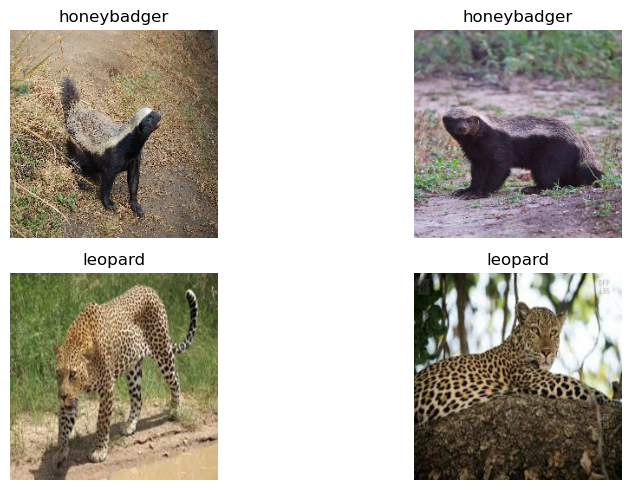

In [5]:
# Select 2 random indices from each class
selected_indices = []
for class_idx in range(len(categories)):
    class_indices = np.where(labels == class_idx)[0]
    sampled = random.sample(list(class_indices), 2)
    selected_indices.extend(sampled)

# Plot the selected images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(selected_indices):
    plt.subplot(2, 2, i + 1)
    plt.imshow(data[idx])
    plt.title(categories[labels[idx]])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [6]:
# Train/test split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

In [7]:
# Define the neural network model
#model = models.Sequential([
#    layers.Flatten(),
#    layers.Dense(128, activation='relu'),
#    layers.Dropout(0.5),  # Add dropout for regularization
#    layers.Dense(64, activation='relu'),  # Add additional layer
#    layers.Dense(3, activation='softmax')
#])

In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

c:\Users\Nang'alelwa\.conda\envs\intro-ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Define the neural network model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Define callbacks for plotting
class PlotCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        plt.clf()
        plt.plot(self.model.history.history['accuracy'], label='accuracy')
        plt.plot(self.model.history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.show()
        
        plt.clf()
        plt.plot(self.model.history.history['loss'], label='loss')
        plt.plot(self.model.history.history['val_loss'], label='val_loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend(loc='upper right')
        plt.show()

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.4)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5668 - loss: 0.9266 - val_accuracy: 0.6386 - val_loss: 0.8085
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7824 - loss: 0.4573 - val_accuracy: 0.5663 - val_loss: 0.7025
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7857 - loss: 0.4854 - val_accuracy: 0.6747 - val_loss: 0.5271
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8317 - loss: 0.3689 - val_accuracy: 0.8072 - val_loss: 0.3962
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9246 - loss: 0.2509 - val_accuracy: 0.8193 - val_loss: 0.3677
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9068 - loss: 0.1930 - val_accuracy: 0.8434 - val_loss: 0.3943
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.9736 - loss: 0.1268 - val_accuracy: 0.8554 - val_loss: 0.3446
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 971ms/step - accuracy: 0.9947 - loss: 0.0992 - val_accuracy: 0.8434 - val_loss: 0.3703
Epoch 9/20
4/

In [12]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8686 - loss: 0.5901
Test accuracy: 0.8653846383094788


In [13]:
# Generate predictions with threshold
threshold = 0.8  # Adjust this based on your needs
y_pred = []
for img in x_test:
    pred, _ = predict_with_threshold(model, img, threshold)
    y_pred.append(pred)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


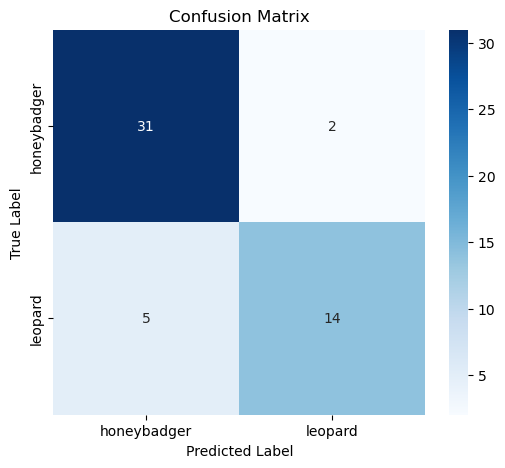

In [14]:
# Generate predictions for the entire test set
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
category_names = ['honeybadger','leopard']

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_names, yticklabels=category_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# save the model
model.save('animals.keras')

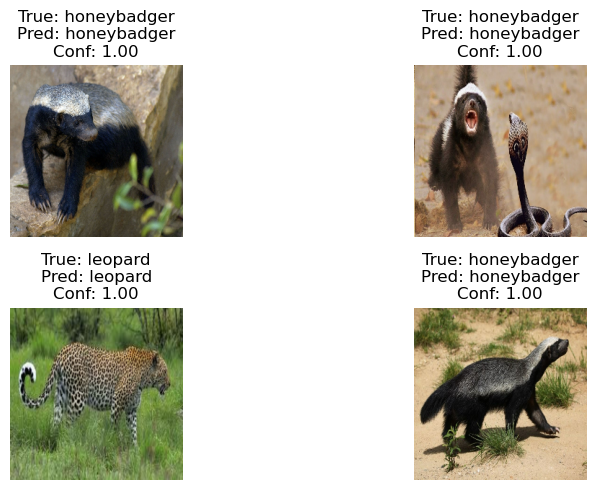

In [25]:
# Test the prediction function on sample images
plt.figure(figsize=(10, 5))
for i in range(4):
    idx = random.randint(0, len(x_test)-1)
    img = x_test[idx]
    true_label = categories[y_test[idx]]
    
    pred_label, confidence = predict_with_threshold(model, img, threshold)
    
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()